# Verification Results Viewer

Visualizes CSV outputs from all verification notebooks without rerunning
simulations.  Each section corresponds to one notebook and its outputs.

**Convention**: Only analogous methods are overlaid on the same plot
(e.g., multiple mesh densities from the same solver).  Analytical model
predictions are not mixed with FEM simulation results.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 11,
    'axes.grid': True,
    'grid.alpha': 0.3,
})

RESULTS = os.path.abspath('results')


def load_csv(filename):
    """Load a results CSV, returning None if not found."""
    path = os.path.join(RESULTS, filename)
    if os.path.exists(path):
        return np.loadtxt(path, delimiter=',', skiprows=1)
    print(f'  Not found: {filename}')
    return None


def load_critical_csv(filename):
    """Load a critical-values CSV as list of dicts."""
    import csv
    path = os.path.join(RESULTS, filename)
    if not os.path.exists(path):
        print(f'  Not found: {filename}')
        return None
    with open(path) as f:
        return list(csv.DictReader(f))


# Inventory of available results
print('Available CSV files:')
for f in sorted(os.listdir(RESULTS)):
    if f.endswith('.csv'):
        print(f'  {f}')

Available CSV files:
  analytical_critical_values.csv
  analytical_force_displacement.csv
  calculix_2d_force_displacement.csv
  calculix_3d_force_displacement.csv
  comparison_critical_values.csv
  skfem_2d_force_displacement.csv
  skfem_2d_full_100pct.csv
  skfem_2d_full_10pct.csv
  skfem_2d_full_50pct.csv
  skfem_3d_force_displacement.csv


---
## Notebook 1 — Analytical Model

Qiu/Pham energy minimization for a single CCS half-beam.  Two beam
profiles: uniform width and CCS (stepped width).  Both are analytical
predictions from the same model.

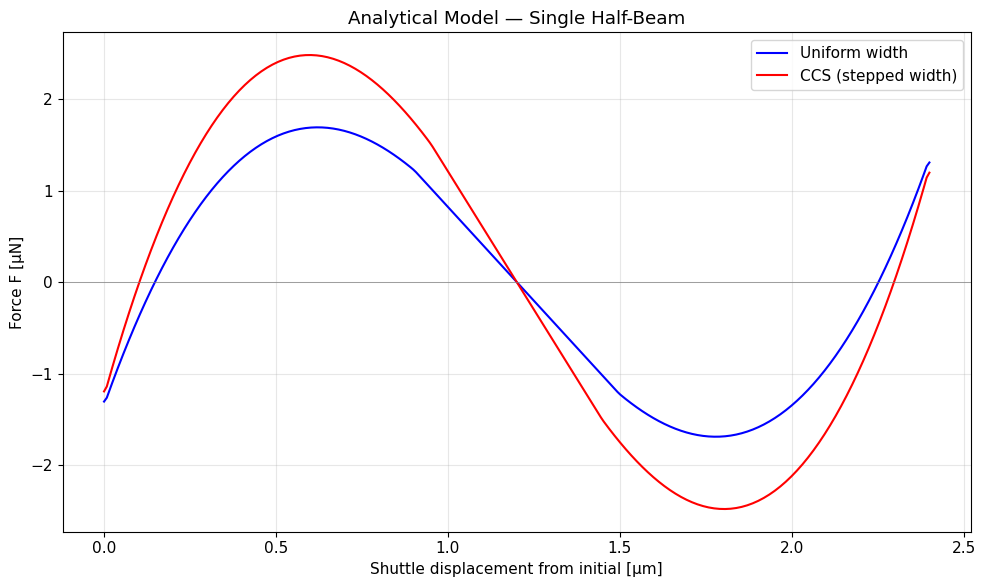

Uniform:  F_push = 1.6909 µN,  F_pop = -1.6909 µN
CCS:      F_push = 2.4814 µN,  F_pop = -2.4814 µN


In [2]:
ana = load_csv('analytical_force_displacement.csv')

if ana is not None:
    fig, ax = plt.subplots()
    ax.plot(ana[:, 0], ana[:, 1], 'b-', linewidth=1.5, label='Uniform width')
    ax.plot(ana[:, 0], ana[:, 2], 'r-', linewidth=1.5, label='CCS (stepped width)')
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('Analytical Model — Single Half-Beam')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    print(f'Uniform:  F_push = {ana[:,1].max():.4f} µN,  F_pop = {ana[:,1].min():.4f} µN')
    print(f'CCS:      F_push = {ana[:,2].max():.4f} µN,  F_pop = {ana[:,2].min():.4f} µN')

In [3]:
crit = load_critical_csv('analytical_critical_values.csv')

if crit is not None:
    print(f"{'Beam':15s} {'F_push [µN]':>12s} {'F_pop [µN]':>12s} {'|pop/push|':>12s}")
    print('-' * 55)
    for row in crit:
        print(f"{row['method']:15s} {row['F_push_uN']:>12s} {row['F_pop_uN']:>12s} "
              f"{row['push_pop_ratio']:>12s}")

Beam             F_push [µN]   F_pop [µN]   |pop/push|
-------------------------------------------------------
uniform_cosine      1.690941    -1.690941       1.0000
ccs_half_beam       2.481383    -2.481383       1.0000


---
## Notebook 2a — scikit-fem 2D Plane Strain (Half-Beam)

Single CCS half-beam, P1 triangles, Total Lagrangian nonlinear.  
Anchor clamped, shuttle u_x free.

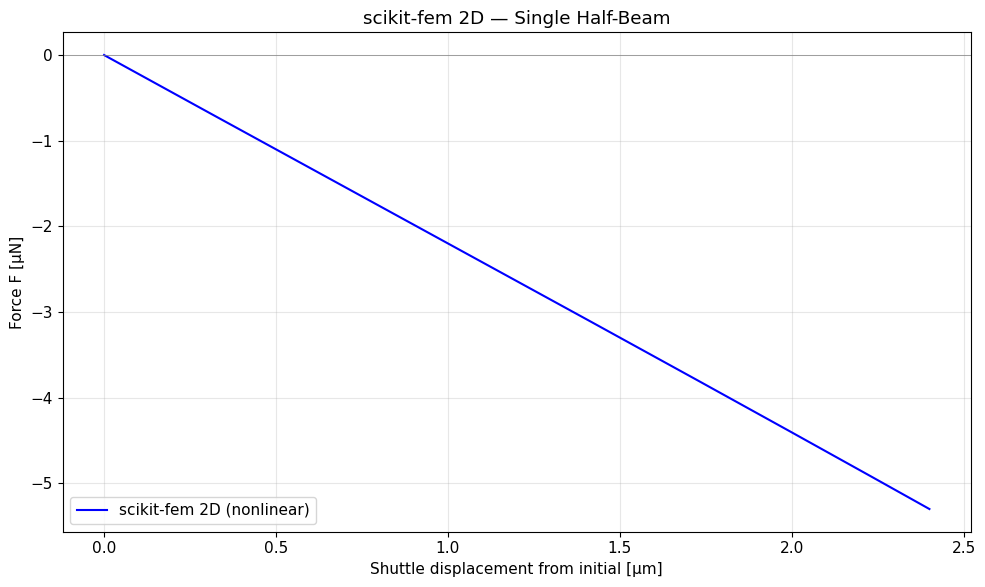

F range: [-5.2984, 0.0000] µN


In [4]:
skfem_2d = load_csv('skfem_2d_force_displacement.csv')

if skfem_2d is not None:
    fig, ax = plt.subplots()
    ax.plot(skfem_2d[:, 0], skfem_2d[:, 1], 'b-', linewidth=1.5,
            label='scikit-fem 2D (nonlinear)')
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('scikit-fem 2D — Single Half-Beam')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    print(f'F range: [{skfem_2d[:,1].min():.4f}, {skfem_2d[:,1].max():.4f}] µN')

---
## Notebook 2b — scikit-fem 3D Extruded (Half-Beam)

Single CCS half-beam extruded by t=0.5 µm, P1 tetrahedra.

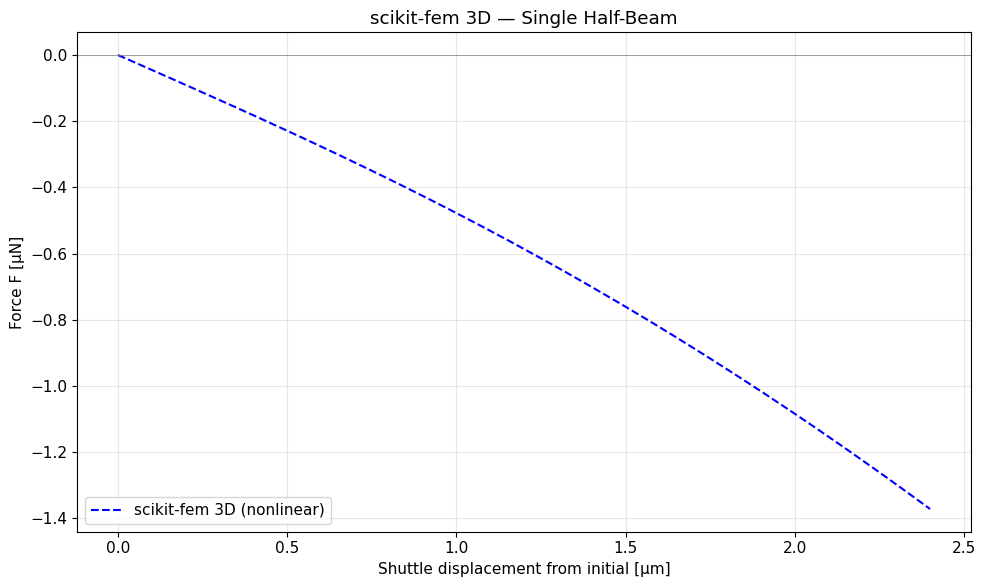

F range: [-1.3718, 0.0000] µN


In [5]:
skfem_3d = load_csv('skfem_3d_force_displacement.csv')

if skfem_3d is not None:
    fig, ax = plt.subplots()
    ax.plot(skfem_3d[:, 0], skfem_3d[:, 1], 'b--', linewidth=1.5,
            label='scikit-fem 3D (nonlinear)')
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('scikit-fem 3D — Single Half-Beam')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    print(f'F range: [{skfem_3d[:,1].min():.4f}, {skfem_3d[:,1].max():.4f}] µN')

---
## Notebook 3a — CalculiX 2D Plane Strain (Half-Beam)

Single CCS half-beam, CPE3 elements, NLGEOM.

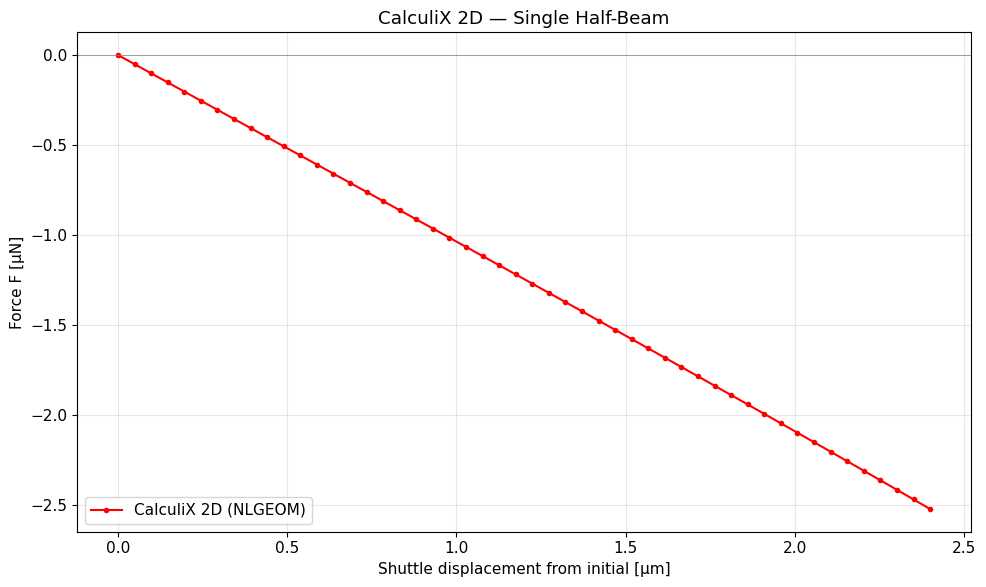

F range: [-2.5197, 0.0000] µN


In [6]:
ccx_2d = load_csv('calculix_2d_force_displacement.csv')

if ccx_2d is not None:
    fig, ax = plt.subplots()
    ax.plot(ccx_2d[:, 0], ccx_2d[:, 1], 'ro-', linewidth=1.5, ms=3,
            label='CalculiX 2D (NLGEOM)')
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('CalculiX 2D — Single Half-Beam')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    print(f'F range: [{ccx_2d[:,1].min():.4f}, {ccx_2d[:,1].max():.4f}] µN')

---
## Notebook 3b — CalculiX 3D Extruded (Half-Beam)

Single CCS half-beam, C3D10 elements, NLGEOM.

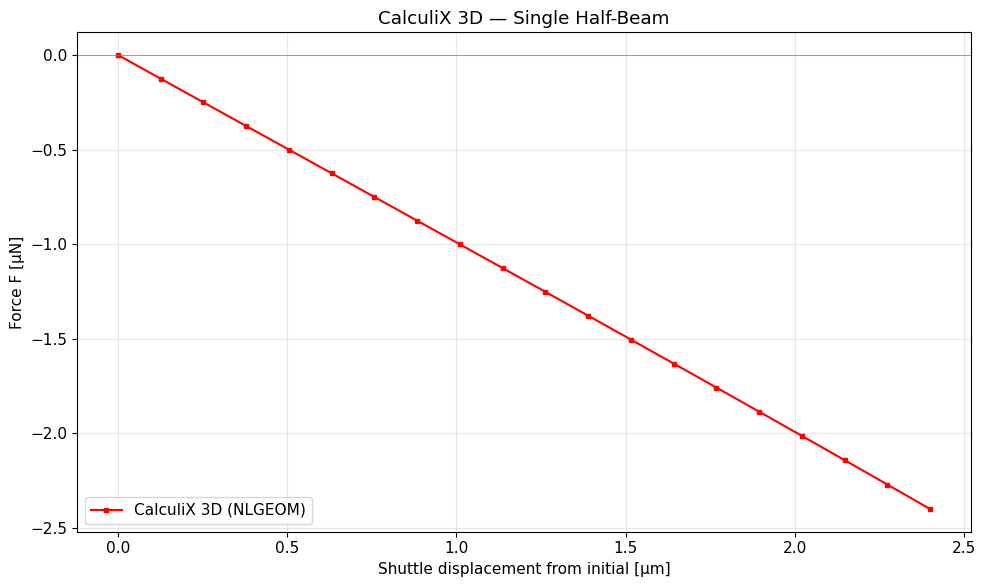

F range: [-2.3995, 0.0000] µN


In [7]:
ccx_3d = load_csv('calculix_3d_force_displacement.csv')

if ccx_3d is not None:
    fig, ax = plt.subplots()
    ax.plot(ccx_3d[:, 0], ccx_3d[:, 1], 'rs-', linewidth=1.5, ms=3,
            label='CalculiX 3D (NLGEOM)')
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('CalculiX 3D — Single Half-Beam')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    print(f'F range: [{ccx_3d[:,1].min():.4f}, {ccx_3d[:,1].max():.4f}] µN')

---
## Half-Beam FEM Cross-Comparison

All four FEM half-beam results overlaid (no analytical).  These all
simulate the same geometry with the same BCs — differences come from
the solver (scikit-fem vs CalculiX) and dimensionality (2D vs 3D).

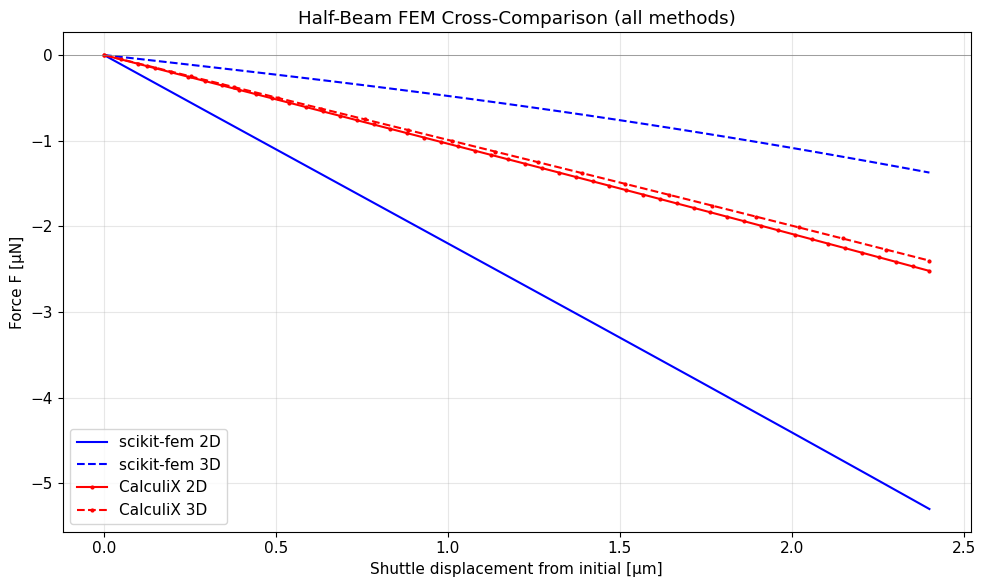

In [8]:
fig, ax = plt.subplots()

half_beam_data = [
    ('skfem_2d_force_displacement.csv', 'scikit-fem 2D', 'b-'),
    ('skfem_3d_force_displacement.csv', 'scikit-fem 3D', 'b--'),
    ('calculix_2d_force_displacement.csv', 'CalculiX 2D', 'r-'),
    ('calculix_3d_force_displacement.csv', 'CalculiX 3D', 'r--'),
]

any_loaded = False
for fname, label, style in half_beam_data:
    d = load_csv(fname)
    if d is not None:
        marker = 'o' if 'CalculiX' in label else ''
        ax.plot(d[:, 0], d[:, 1], style, linewidth=1.5, marker=marker,
                markersize=2, label=label)
        any_loaded = True

if any_loaded:
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('Half-Beam FEM Cross-Comparison (all methods)')
    ax.legend()
    fig.tight_layout()
    plt.show()
else:
    plt.close(fig)
    print('No half-beam FEM data available.')

In [9]:
# Half-beam critical values summary
comp = load_critical_csv('comparison_critical_values.csv')

if comp is not None:
    print(f"{'Method':25s} {'F_push [µN]':>12s} {'F_pop [µN]':>12s} {'|pop/push|':>12s}")
    print('-' * 65)
    for row in comp:
        print(f"{row['method']:25s} {row['F_push_uN']:>12s} {row['F_pop_uN']:>12s} "
              f"{row['push_pop_ratio']:>12s}")

Method                     F_push [µN]   F_pop [µN]   |pop/push|
-----------------------------------------------------------------
Analytical (uniform)          1.690941    -1.690941       1.0000
Analytical (CCS)              2.481383    -2.481383       1.0000
scikit-fem 2D                 0.000000    -5.298357       0.0000
scikit-fem 3D                 0.000000    -1.371846       0.0000
CalculiX 2D                   0.000000    -2.519697       0.0000
CalculiX 3D                   0.000000    -2.399474       0.0000


---
## Notebook 4a — scikit-fem 2D Full Spring

Complete doubly-clamped bistable spring (4 half-beams + shuttle),
both anchors clamped.  P1 triangles, Total Lagrangian.  
Three mesh densities: 10%, 50%, 100%.

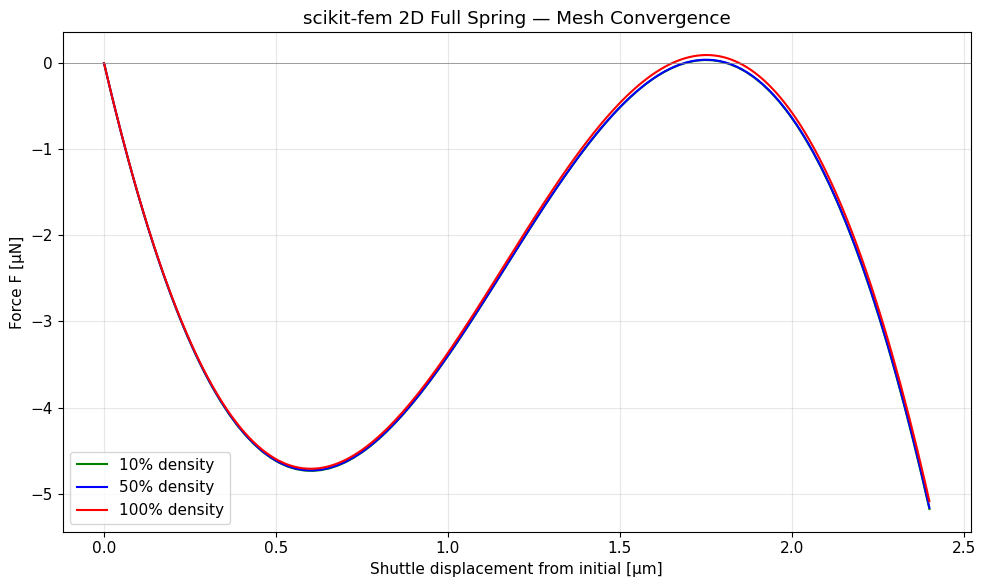

In [10]:
fig, ax = plt.subplots()

skfem_2d_full = {}
colors = {'10pct': 'green', '50pct': 'blue', '100pct': 'red'}
labels = {'10pct': '10% density', '50pct': '50% density', '100pct': '100% density'}

any_loaded = False
for density in ['10pct', '50pct', '100pct']:
    d = load_csv(f'skfem_2d_full_{density}.csv')
    if d is not None:
        skfem_2d_full[density] = d
        ax.plot(d[:, 0], d[:, 1], color=colors[density], linewidth=1.5,
                label=labels[density])
        any_loaded = True

if any_loaded:
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('scikit-fem 2D Full Spring — Mesh Convergence')
    ax.legend()
    fig.tight_layout()
    plt.show()
else:
    plt.close(fig)
    print('No scikit-fem 2D full spring results available.')

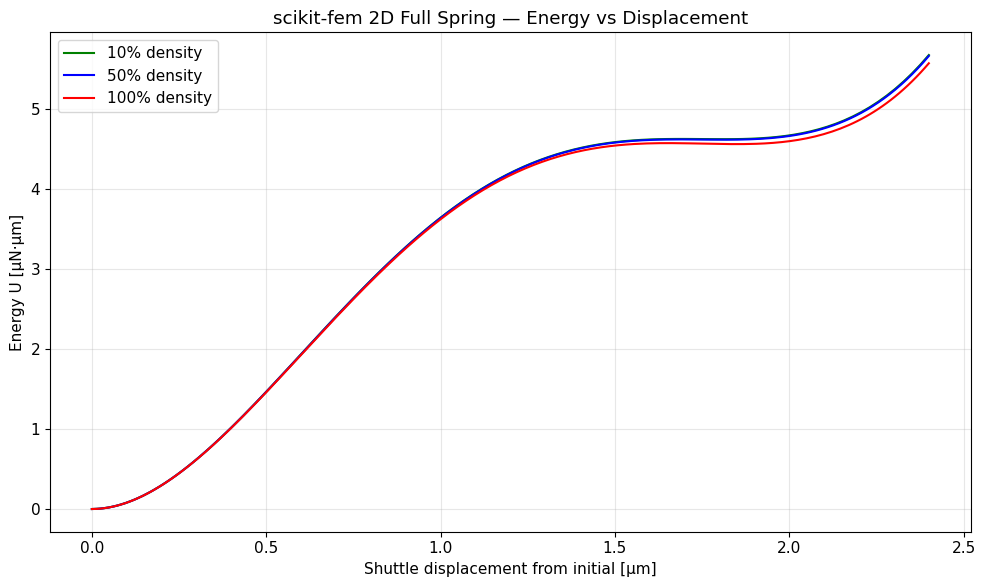

In [11]:
# Energy vs displacement — integrate F(delta) via trapezoidal rule
# E(delta) = -integral of F d(delta)  (work done against the restoring force)
# Sign convention: positive energy = potential well depth

if skfem_2d_full:
    fig, ax = plt.subplots()
    
    for density, d in skfem_2d_full.items():
        delta = d[:, 0]
        F = d[:, 1]
        # Integrate force over displacement: U = -integral(F, d_delta)
        # Using cumulative trapezoidal integration
        energy = np.zeros_like(delta)
        for i in range(1, len(delta)):
            energy[i] = energy[i-1] - 0.5 * (F[i] + F[i-1]) * (delta[i] - delta[i-1])
        
        ax.plot(delta, energy, color=colors[density], linewidth=1.5,
                label=labels[density])
    
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Energy U [µN·µm]')
    ax.set_title('scikit-fem 2D Full Spring — Energy vs Displacement')
    ax.legend()
    fig.tight_layout()
    plt.show()
else:
    print('No data for energy plot.')

In [12]:

# Critical points from derivative sign changes
# Force critical points: where dF/d(delta) changes sign
# Energy critical points: where dU/d(delta) changes sign (equivalently, F changes sign)

def find_sign_changes(x, y):
    """Find x-values where y changes sign via linear interpolation."""
    pts = []
    for i in range(len(y) - 1):
        if y[i] * y[i+1] < 0:
            # Linear interpolation for zero crossing
            frac = y[i] / (y[i] - y[i+1])
            x_cross = x[i] + frac * (x[i+1] - x[i])
            y_at = 0.0  # by definition
            pts.append((x_cross, y_at))
    return pts

def find_derivative_sign_changes(x, y):
    """Find (x, y) where dy/dx changes sign (local extrema)."""
    dy = np.diff(y)
    dx = np.diff(x)
    dydx = dy / dx
    pts = []
    for i in range(len(dydx) - 1):
        if dydx[i] * dydx[i+1] < 0:
            # Extremum is between x[i] and x[i+2]; use midpoint x[i+1]
            pts.append((x[i+1], y[i+1]))
    return pts

HDR_NUM = '#'
HDR_DELTA = '\u03b4 [\u00b5m]'
HDR_FORCE = 'F [\u00b5N]'
HDR_ENERGY = 'U [\u00b5N\u00b7\u00b5m]'

if skfem_2d_full:
    for density in ['10pct', '50pct', '100pct']:
        if density not in skfem_2d_full:
            continue
        d = skfem_2d_full[density]
        delta = d[:, 0]
        F = d[:, 1]

        # Compute energy via cumulative trapezoidal integration
        energy = np.zeros_like(delta)
        for i in range(1, len(delta)):
            energy[i] = energy[i-1] - 0.5 * (F[i] + F[i-1]) * (delta[i] - delta[i-1])

        # Force critical points: where dF/d(delta) changes sign
        force_crits = find_derivative_sign_changes(delta, F)
        # Energy critical points: where dU/d(delta) changes sign
        energy_crits = find_derivative_sign_changes(delta, energy)

        print(f'=== {labels[density]} ===')
        print(f'\nForce critical points (dF/d\u03b4 sign change):')
        print(f'  {HDR_NUM:>3s}  {HDR_DELTA:>10s}  {HDR_FORCE:>10s}')
        for j, (xc, yc) in enumerate(force_crits, 1):
            print(f'  {j:3d}  {xc:10.4f}  {yc:10.4f}')
        if not force_crits:
            print('  (none found)')

        print(f'\nEnergy critical points (dU/d\u03b4 sign change):')
        print(f'  {HDR_NUM:>3s}  {HDR_DELTA:>10s}  {HDR_ENERGY:>12s}')
        for j, (xc, yc) in enumerate(energy_crits, 1):
            print(f'  {j:3d}  {xc:10.4f}  {yc:12.4f}')
        if not energy_crits:
            print('  (none found)')

        print()
else:
    print('No data for critical point analysis.')


=== 10% density ===

Force critical points (dF/dδ sign change):
    #      δ [µm]      F [µN]
    1      0.6061     -4.7354
    2      1.7455      0.0376

Energy critical points (dU/dδ sign change):
    #      δ [µm]     U [µN·µm]
    1      1.6970        4.6219
    2      1.8182        4.6189

=== 50% density ===

Force critical points (dF/dδ sign change):
    #      δ [µm]      F [µN]
    1      0.5960     -4.7294
    2      1.7557      0.0403

Energy critical points (dU/dδ sign change):
    #      δ [µm]     U [µN·µm]
    1      1.6913        4.6157
    2      1.8201        4.6123

=== 100% density ===

Force critical points (dF/dδ sign change):
    #      δ [µm]      F [µN]
    1      0.6030     -4.7105
    2      1.7487      0.0951

Energy critical points (dU/dδ sign change):
    #      δ [µm]     U [µN·µm]
    1      1.6523        4.5696
    2      1.8452        4.5571



---
## Notebook 4b — scikit-fem 3D Full Spring

Complete doubly-clamped spring extruded by t=0.5 µm, P1 tetrahedra.  
Three mesh densities.

In [13]:
fig, ax = plt.subplots()

skfem_3d_full = {}
any_loaded = False
for density in ['10pct', '50pct', '100pct']:
    d = load_csv(f'skfem_3d_full_{density}.csv')
    if d is not None:
        skfem_3d_full[density] = d
        ax.plot(d[:, 0], d[:, 1], color=colors[density], linewidth=1.5,
                linestyle='--', label=labels[density])
        any_loaded = True

if any_loaded:
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('scikit-fem 3D Full Spring — Mesh Convergence')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    for density, d in skfem_3d_full.items():
        print(f'{labels[density]:15s}  F range: [{d[:,1].min():.4f}, {d[:,1].max():.4f}] µN')
else:
    plt.close(fig)
    print('No scikit-fem 3D full spring results available.  Run notebook 4b first.')

  Not found: skfem_3d_full_10pct.csv
  Not found: skfem_3d_full_50pct.csv
  Not found: skfem_3d_full_100pct.csv
No scikit-fem 3D full spring results available.  Run notebook 4b first.


---
## Notebook 5a — CalculiX 2D Full Spring

Complete doubly-clamped spring, CPE3 elements, NLGEOM.  
Three mesh densities.

In [14]:
fig, ax = plt.subplots()

ccx_2d_full = {}
any_loaded = False
for density in ['10pct', '50pct', '100pct']:
    d = load_csv(f'calculix_2d_full_{density}.csv')
    if d is not None:
        ccx_2d_full[density] = d
        ax.plot(d[:, 0], d[:, 1], 'o-', color=colors[density], linewidth=1.5,
                ms=2, label=labels[density])
        any_loaded = True

if any_loaded:
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('CalculiX 2D Full Spring — Mesh Convergence')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    for density, d in ccx_2d_full.items():
        print(f'{labels[density]:15s}  F range: [{d[:,1].min():.4f}, {d[:,1].max():.4f}] µN')
else:
    plt.close(fig)
    print('No CalculiX 2D full spring results available.  Run notebook 5a first.')

  Not found: calculix_2d_full_10pct.csv
  Not found: calculix_2d_full_50pct.csv
  Not found: calculix_2d_full_100pct.csv
No CalculiX 2D full spring results available.  Run notebook 5a first.


---
## Notebook 5b — CalculiX 3D Full Spring

Complete doubly-clamped spring, C3D10 elements, NLGEOM.  
Three mesh densities.

In [15]:
fig, ax = plt.subplots()

ccx_3d_full = {}
any_loaded = False
for density in ['10pct', '50pct', '100pct']:
    d = load_csv(f'calculix_3d_full_{density}.csv')
    if d is not None:
        ccx_3d_full[density] = d
        ax.plot(d[:, 0], d[:, 1], 's-', color=colors[density], linewidth=1.5,
                ms=2, label=labels[density])
        any_loaded = True

if any_loaded:
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('CalculiX 3D Full Spring — Mesh Convergence')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    for density, d in ccx_3d_full.items():
        print(f'{labels[density]:15s}  F range: [{d[:,1].min():.4f}, {d[:,1].max():.4f}] µN')
else:
    plt.close(fig)
    print('No CalculiX 3D full spring results available.  Run notebook 5b first.')

  Not found: calculix_3d_full_10pct.csv
  Not found: calculix_3d_full_50pct.csv
  Not found: calculix_3d_full_100pct.csv
No CalculiX 3D full spring results available.  Run notebook 5b first.


---
## Full Spring FEM Cross-Comparison

Finest mesh (100%) from each FEM method overlaid.  All simulate the same
doubly-clamped spring geometry with the same BCs — differences come from
solver and dimensionality.

  Not found: skfem_3d_full_100pct.csv
  Not found: calculix_2d_full_100pct.csv
  Not found: calculix_3d_full_100pct.csv


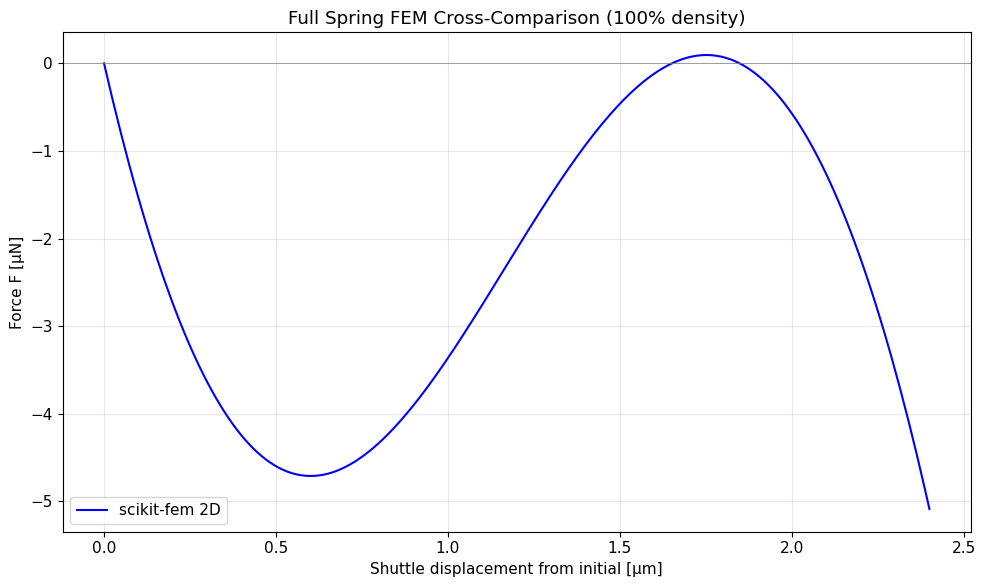

In [16]:
fig, ax = plt.subplots()

full_spring_finest = [
    ('skfem_2d_full_100pct.csv', 'scikit-fem 2D', 'b-'),
    ('skfem_3d_full_100pct.csv', 'scikit-fem 3D', 'b--'),
    ('calculix_2d_full_100pct.csv', 'CalculiX 2D', 'r-'),
    ('calculix_3d_full_100pct.csv', 'CalculiX 3D', 'r--'),
]

any_loaded = False
for fname, label, style in full_spring_finest:
    d = load_csv(fname)
    if d is not None:
        marker = 'o' if 'CalculiX' in label else ''
        ax.plot(d[:, 0], d[:, 1], style, linewidth=1.5, marker=marker,
                markersize=2, label=label)
        any_loaded = True

if any_loaded:
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.set_xlabel('Shuttle displacement from initial [µm]')
    ax.set_ylabel('Force F [µN]')
    ax.set_title('Full Spring FEM Cross-Comparison (100% density)')
    ax.legend()
    fig.tight_layout()
    plt.show()
else:
    plt.close(fig)
    print('No full spring 100% results available.')

In [17]:
# Full spring critical values summary (if available)
fsc = load_critical_csv('full_spring_comparison.csv')

if fsc is not None:
    print(f"{'Method':30s} {'F_push [µN]':>12s} {'F_pop [µN]':>12s} {'|pop/push|':>12s}")
    print('-' * 70)
    for row in fsc:
        print(f"{row['method']:30s} {row['F_push_uN']:>12s} {row['F_pop_uN']:>12s} "
              f"{row['push_pop_ratio']:>12s}")
else:
    print('Run notebook 5b to generate cross-comparison table.')

  Not found: full_spring_comparison.csv
Run notebook 5b to generate cross-comparison table.
